# The Integrated Ornstein Uhlenbeck Process


Given an Ornstein-Uhlenbeck process defined by the SDE (in one dimension):

$$d X=-\theta X dt+\sigma dW$$

this process is the integral

$$ Y(t)=\int_0^t X(s) ds $$

It can be used to approximated white noise. 

For $\theta=0$ and $\sigma=1$ the OUP ist the Wiener Process, and the processes is the integral

$$
Y(t)=\int_0^t W(s) ds 
$$.

The multivariate version is just the integral of the multivariate Ornstein-Uhlenbeck process

In [1]:
## This is just for colors of the plots
from palettable.wesanderson import GrandBudapest3_6
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler(color=GrandBudapest3_6.mpl_colors)
## --------

import matplotlib.pyplot as plt
import numpy as np
import stopro as p

## Simple I-OUP

A simple one-dimensional realization of the Integrated Ornstein Uhlenbeck process is generated with the command:

`p.integrated_ornsteinuhlenbeck(T,dt)`

by default, the timescale $\tau=1/\theta$ and variability $v=\sigma/\sqrt(2\theta)$ are set to unity. Because of this the traditional parameters of the OUP as defined by

$$d X=-\theta X dt+\sigma dW$$

are $\theta=1$ and $\sigma=\sqrt{2}$.

The function `integrated_ornsteinuhlenbeck()` takes all the keywords like `covariance`, `mixing_matrix`,`dimension`,`steps`, `gap` etc. that the function `ornstein_uhlenbeck()` and `wiener()` take, too.

In addition you can set the timescale and variablity using the `timescale` and `stdev` keywords to set the timescale and the standard deviation.

Also, you can specify the `initial_condition` keyword to either the string `"stationary"` or an initial value. For stationary, the initial condition for the process is chose from the Gaussian stationary distribution of the Ornstein-Uhlenbeck process. This can only be done if $\theta>0$ because only then, the underlying OUP process is stationary.

Let's start with a few realizations of a one-dimensional I-OUP:

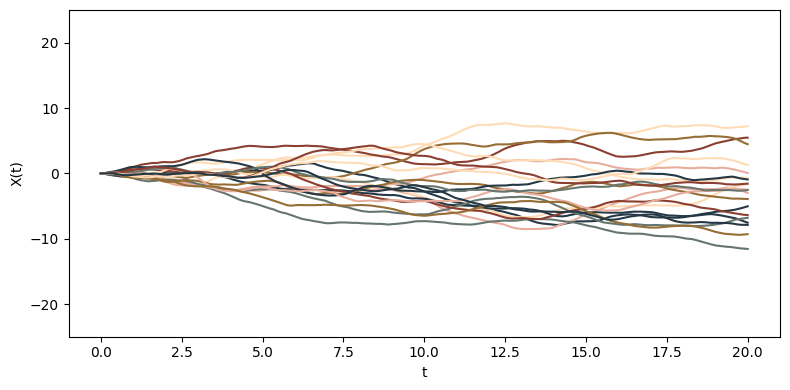

In [2]:
T = 20
dt = 0.001
samples = 20
res = p.integrated_ornstein_uhlenbeck(T,dt, samples = samples)
t = res["t"]
X = res["X"]
fig,ax = plt.subplots(figsize=[8,4])

for x in X:
    ax.plot(t,x)

plt.xlabel("t")
plt.ylabel("X(t)")
plt.ylim([-25,25])
plt.tight_layout()
plt.show()

#### Now we change timescale and standard deviation

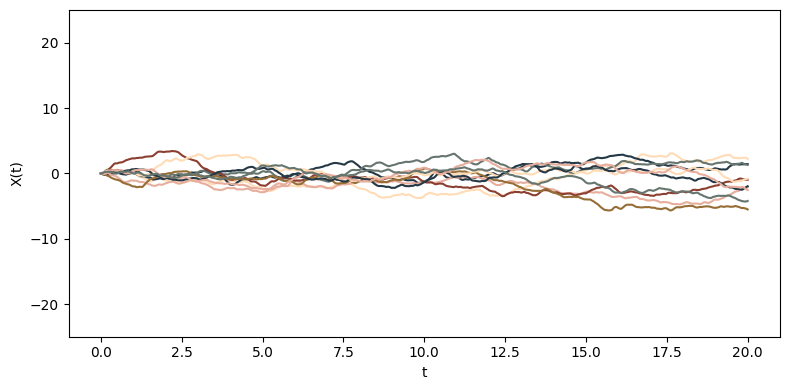

In [3]:
T = 20
dt = 0.001
gap = 10
samples = 10
stdev = 2
timescale = 0.1
res = p.integrated_ornstein_uhlenbeck(T,dt, samples = samples, stdev = stdev, timescale = timescale, gap = gap)

t = res["t"]
X = res["X"]
fig,ax = plt.subplots(figsize=[8,4])

for x in X:
    ax.plot(t,x)

plt.xlabel("t")
plt.ylabel("X(t)")
plt.ylim([-25,25])
plt.tight_layout()
plt.show()

## Here's the limiting case of the Integral of the Wiener Process

which we get if we set $\theta=0$ ($\sigma=1$ is default).

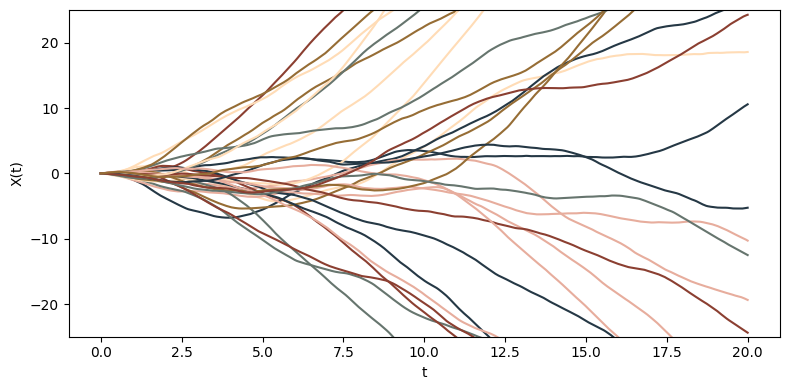

In [4]:
T = 20
dt = 0.001
gap = 10
samples = 30
theta = 0
res = p.integrated_ornstein_uhlenbeck(T,dt, samples = samples, gap = gap, theta=theta)

t = res["t"]
X = res["X"]
fig,ax = plt.subplots(figsize=[8,4])

for x in X:
    ax.plot(t,x)

plt.xlabel("t")
plt.ylabel("X(t)")
plt.ylim([-25,25])
plt.tight_layout()
plt.show()